In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
original = pd.read_csv("../waterlevel.csv")
original.shape

(141, 4)

In [73]:
prediction_readings = pd.read_csv("../gauge_readings.csv")
prediction_readings.shape

EmptyDataError: No columns to parse from file

In [93]:
original[original["Water Level"].isnull()]

,Image Name,Water Level,Gauge ID,Notes


In [94]:
prediction_readings[prediction_readings["gauge_reading"].isnull()]

,image,is_valid_gauge,gauge_reading
1,2.png,False,NaN


In [95]:
df = original.copy()
df["predicted_gauge_reading"] = prediction_readings["gauge_reading"]

In [ ]:
# replace null gauge_reading with -1
# df["predicted_gauge_reading"].fillna(-1, inplace=True)
# df[df["predicted_gauge_reading"]==-1]

/tmp/ipykernel_6344/237595213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["predicted_gauge_reading"].fillna(-1, inplace=True)


,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
1,2,1.50,LA1004,Blury,-1.0
36,37,2.08,LA1039,NaN,-1.0
37,38,3.10,LA1040,NaN,-1.0
38,39,2.72,LA1041,NaN,-1.0
39,40,2.38,LA1042,NaN,-1.0
...,...,...,...,...,...
136,137,1.00,NY1054,NaN,-1.0
137,138,1.00,NH1000,NaN,-1.0
138,139,1.46,NY1054,NaN,-1.0
139,140,1.60,NH1000,NaN,-1.0


In [96]:
# set predicted gauge value below -2 to actual*-1
df.loc[df["predicted_gauge_reading"] < -2, "predicted_gauge_reading"] = df["predicted_gauge_reading"] * (-1)

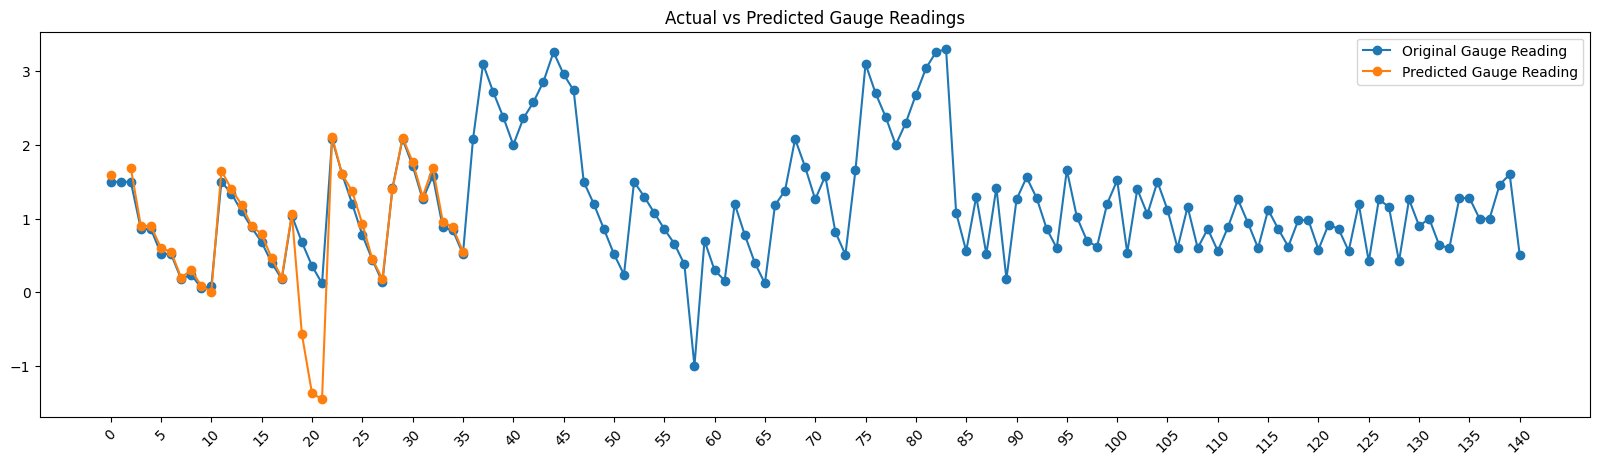

In [97]:
plt.figure(figsize=(20, 5))
plt.plot(df["Water Level"], marker='o', label='Original Gauge Reading')
plt.plot(df["predicted_gauge_reading"], marker='o', label="Predicted Gauge Reading")

# x label in 5 interval
plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [77]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(df["Water Level"], df["predicted_gauge_reading"])
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 0.6792314179636688


In [79]:
# number of negative predictions
negative_predictions = df[df["predicted_gauge_reading"] < 0]
print(f"Number of disregarded: {len(negative_predictions)}")
negative_predictions.head(10)

Number of disregarded: 10


,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
1,2,1.50,LA1004,Blury,-1.00
4,5,0.86,LA1007,NaN,-1.00
13,14,1.10,LA1016,NaN,-1.00
18,19,1.04,LA1021,NaN,-1.00
19,20,0.68,LA1022,NaN,-0.01
21,22,0.12,LA1024,Reflection,-1.30
37,38,3.10,LA1040,NaN,-1.00
58,59,-1.00,LA1061,Water out of image,-0.01
78,79,2.00,LA1081,NaN,-1.00
79,80,2.30,LA1082,NaN,-1.00


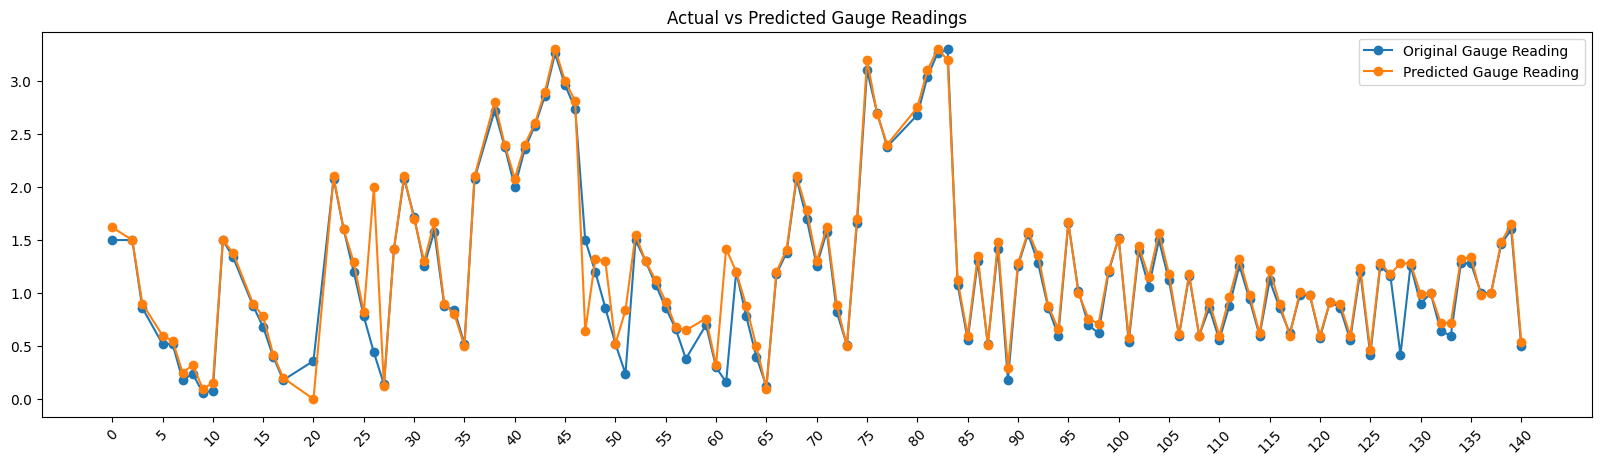

In [64]:
# drop negative gauge readings;
df = df[df["predicted_gauge_reading"] >= 0]
plt.figure(figsize=(20, 5))
plt.plot(df["Water Level"], marker='o', label='Original Gauge Reading')
plt.plot(df["predicted_gauge_reading"], marker='o', label="Predicted Gauge Reading")

plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [65]:
df["Water Level"].describe()

count    131.000000
mean       1.179771
std        0.758793
min        0.060000
25%        0.600000
50%        1.060000
75%        1.500000
max        3.300000
Name: Water Level, dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
df = df[df["predicted_gauge_reading"] >= 0]
rmse = root_mean_squared_error(df["Water Level"], df["predicted_gauge_reading"])
# mae = mean_absolute_error(df["Water Level"], df["predicted_gauge_reading"])
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 0.2244127195644001


In [80]:
df = df[df["predicted_gauge_reading"] >= 0]
df.head(100)

,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
0,1,1.50,LA1003,NaN,1.62
2,3,1.50,LA1005,NaN,1.50
3,4,0.86,LA1006,NaN,0.90
5,6,0.52,LA1008,NaN,0.60
6,7,0.52,LA1009,NaN,0.55
...,...,...,...,...,...
105,106,1.12,NY1051,NaN,1.18
106,107,0.60,NY1051,NaN,0.61
107,108,1.16,WI1021,NaN,1.18
108,109,0.60,WA1000,NaN,0.60


# Station Label Classification Evaluation

In [247]:
original = pd.read_csv("../waterlevel.csv")
original.shape

(141, 4)

In [248]:
original = original[original["Image Name"] > 74]
original.shape

(67, 4)

In [249]:
prediction_readings = pd.read_csv("../station_labels_old.csv")
prediction_readings.shape

(67, 3)

In [250]:
prediction_readings.head()

,image,is_valid_station_label,station_id
0,75.png,True,LA1003
1,76.png,True,LA1003
2,77.png,True,LA1003
3,78.png,True,LA1003
4,79.png,True,LA1003


In [251]:
prediction_readings["station_id"].isnull().sum() / prediction_readings.shape[0]

np.float64(0.13432835820895522)

In [252]:
# gauge_reading null count
print("Null values in predicted_gauge_reading:", prediction_readings["station_id"].isnull().sum())

Null values in predicted_gauge_reading: 9


In [253]:
df = original.copy()
df

,Image Name,Water Level,Gauge ID,Notes
74,75,1.66,LA1003,NaN
75,76,3.10,LA1003,NaN
76,77,2.70,LA1003,NaN
77,78,2.38,LA1003,NaN
78,79,2.00,LA1003,NaN
...,...,...,...,...
136,137,1.00,NY1054,NaN
137,138,1.00,NH1000,NaN
138,139,1.46,NY1054,NaN
139,140,1.60,NH1000,NaN


In [254]:
df["predicted_station_id"] = prediction_readings["station_id"].to_numpy()
df

,Image Name,Water Level,Gauge ID,Notes,predicted_station_id
74,75,1.66,LA1003,NaN,LA1003
75,76,3.10,LA1003,NaN,LA1003
76,77,2.70,LA1003,NaN,LA1003
77,78,2.38,LA1003,NaN,LA1003
78,79,2.00,LA1003,NaN,LA1003
...,...,...,...,...,...
136,137,1.00,NY1054,NaN,NaN
137,138,1.00,NH1000,NaN,NH1000
138,139,1.46,NY1054,NaN,NaN
139,140,1.60,NH1000,NaN,NH1000


In [255]:
df["predicted_station_id"].isnull().sum()

np.int64(9)

In [256]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# drop na values
df = df.dropna(subset=["predicted_station_id"])
# df["predicted_station_id"] = df["predicted_station_id"].astype(int)
# df["Station ID"] = df["Station ID"].astype(int)
# df.head()
accuracy = accuracy_score(df["Gauge ID"], df["predicted_station_id"])
print(f"Accuracy: {accuracy}")

# print(classification_report(df["Station ID"], df["predicted_station_id"]))

Accuracy: 0.9827586206896551


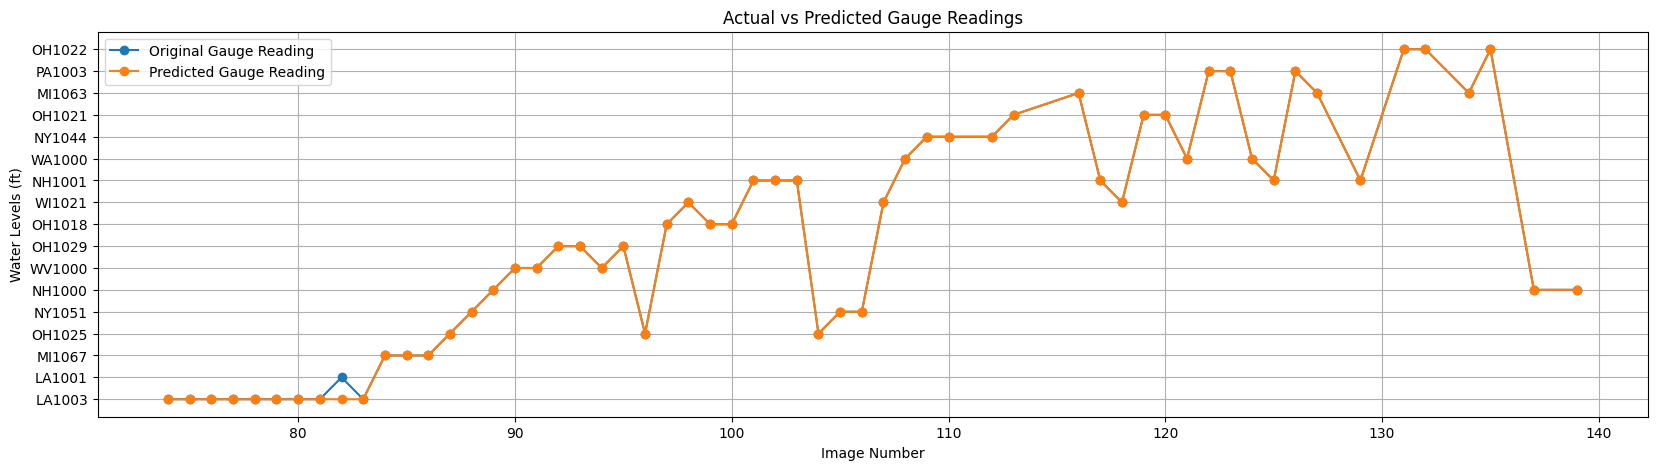

In [257]:
plt.figure(figsize=(20, 5))
plt.plot(df["predicted_station_id"], marker='o', label='Original Gauge Reading')
plt.plot(df["Gauge ID"], marker='o', label="Predicted Gauge Reading")

# x label in 5 interval
# plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
# 0.05 y interval  with min -3 and max 3.5
# plt.ylim(-4, 3.5)
plt.grid(True)
plt.xlabel("Image Number")
plt.ylabel("Water Levels (ft)")

plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [258]:
# predicted_station_id null columns
df["predicted_station_id"]

74     LA1003
75     LA1003
76     LA1003
77     LA1003
78     LA1003
79     LA1003
80     LA1003
81     LA1003
82     LA1001
83     LA1003
84     MI1067
85     MI1067
86     MI1067
87     OH1025
88     NY1051
89     NH1000
90     WV1000
91     WV1000
92     OH1029
93     OH1029
94     WV1000
95     OH1029
96     OH1025
97     OH1018
98     WI1021
99     OH1018
100    OH1018
101    NH1001
102    NH1001
103    NH1001
104    OH1025
105    NY1051
106    NY1051
107    WI1021
108    WA1000
109    NY1044
110    NY1044
112    NY1044
113    OH1021
116    MI1063
117    NH1001
118    WI1021
119    OH1021
120    OH1021
121    WA1000
122    PA1003
123    PA1003
124    WA1000
125    NH1001
126    PA1003
127    MI1063
129    NH1001
131    OH1022
132    OH1022
134    MI1063
135    OH1022
137    NH1000
139    NH1000
Name: predicted_station_id, dtype: object

# Dual Prompt Evalutaion

In [3]:
original = pd.read_csv("../waterlevel.csv")
original.shape

(141, 4)

In [8]:
original = original[original["Image Name"] > 74]
original.head()

,Image Name,Water Level,Gauge ID,Notes
74,75,1.66,LA1003,NaN
75,76,3.10,LA1003,NaN
76,77,2.70,LA1003,NaN
77,78,2.38,LA1003,NaN
78,79,2.00,LA1003,NaN


In [6]:
prediction_readings = pd.read_csv("../station_labels_old.csv")
prediction_readings.shape

(67, 5)

In [7]:
prediction_readings

,image,is_valid_station_label,station_id,is_valid_gauge,gauge_reading
0,75.png,True,LA1003,True,1.70
1,76.png,True,LA1003,True,3.16
2,77.png,True,LA1003,True,2.67
3,78.png,True,LA1003,True,2.48
4,79.png,True,LA1003,True,2.00
...,...,...,...,...,...
62,137.png,False,NaN,True,0.99
63,138.png,True,NH1000,True,0.91
64,139.png,False,NaN,True,1.45
65,140.png,True,NH1000,True,1.68


In [12]:
df = original[["Image Name", "Water Level", "Gauge ID"]].copy()
df["predicted_station_id"] = prediction_readings["station_id"].to_numpy()
df["predicted_gauge_reading"] = prediction_readings["gauge_reading"].to_numpy()

In [18]:
# null count
print("Null values in predicted_station_id:", df["predicted_station_id"].isnull().sum())
print("Null values in predicted_gauge_reading:", df["predicted_gauge_reading"].isnull().sum())

Null values in predicted_station_id: 9
Null values in predicted_gauge_reading: 2


In [17]:
# count rows where either of predicted_station_id or predicted_gauge_reading is null
null_count = df[(df["predicted_station_id"].isnull()) | (df["predicted_gauge_reading"].isnull())].shape[0]
print(f"Number of rows with null values in either predicted_station_id or predicted_gauge_reading: {null_count}")

Number of rows with null values in either predicted_station_id or predicted_gauge_reading: 11


In [20]:
from sklearn.metrics import root_mean_squared_error
df.dropna(subset=["predicted_station_id", "predicted_gauge_reading"], inplace=True)
rmse = root_mean_squared_error(df["Water Level"], df["predicted_gauge_reading"])
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 0.06505492185179271


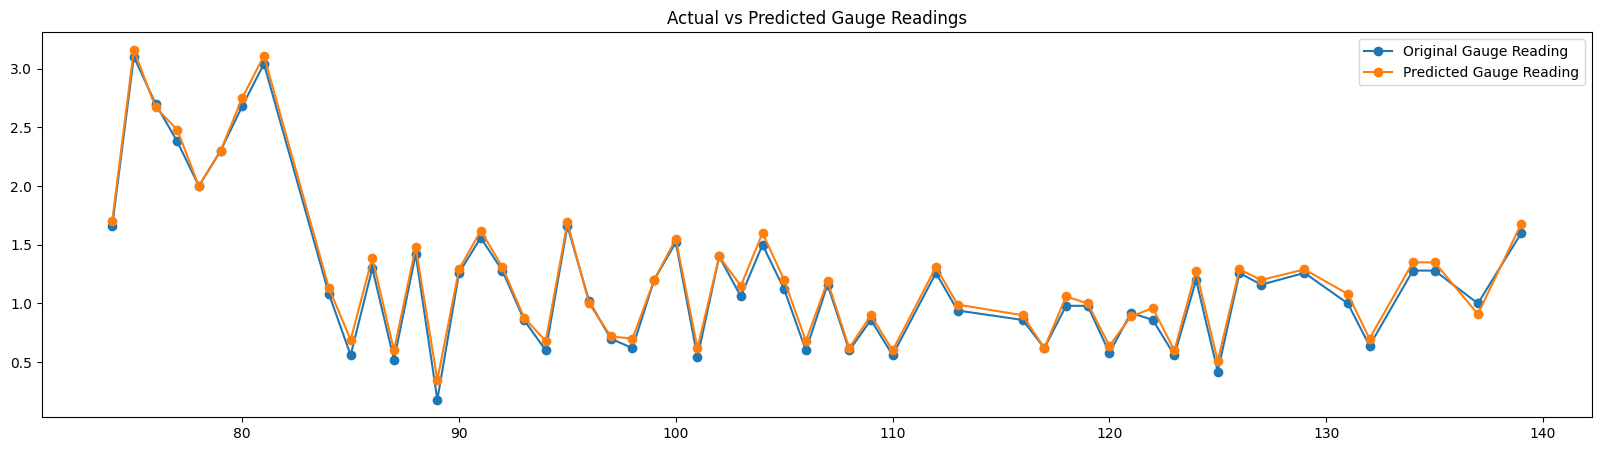

In [21]:
# drop negative gauge readings;
# df = df[df["predicted_gauge_reading"] >= 0]
plt.figure(figsize=(20, 5))
plt.plot(df["Water Level"], marker='o', label='Original Gauge Reading')
plt.plot(df["predicted_gauge_reading"], marker='o', label="Predicted Gauge Reading")

# plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# drop na values
df = df.dropna(subset=["predicted_station_id"])
# df["predicted_station_id"] = df["predicted_station_id"].astype(int)
# df["Station ID"] = df["Station ID"].astype(int)
# df.head()
accuracy = accuracy_score(df["Gauge ID"], df["predicted_station_id"])
print(f"Accuracy: {accuracy}")

# print(classification_report(df["Station ID"], df["predicted_station_id"]))

Accuracy: 1.0


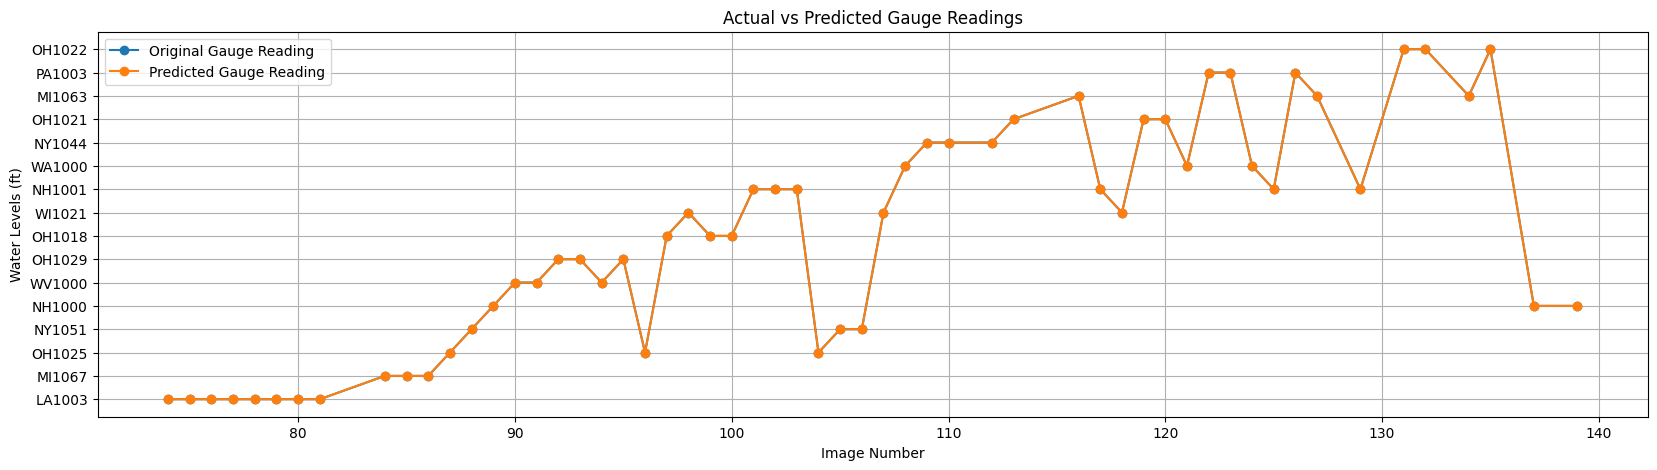

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(df["predicted_station_id"], marker='o', label='Original Gauge Reading')
plt.plot(df["Gauge ID"], marker='o', label="Predicted Gauge Reading")

# x label in 5 interval
# plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
# 0.05 y interval  with min -3 and max 3.5
# plt.ylim(-4, 3.5)
plt.grid(True)
plt.xlabel("Image Number")
plt.ylabel("Water Levels (ft)")

plt.title("Actual vs Predicted Gauge Readings")
plt.show()